<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [22]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Descripcion de valores:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


/tmp/ipython-input-3690545012.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis',data=df,palette='Set2')


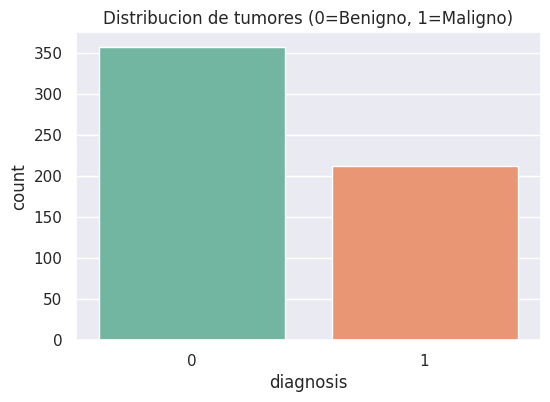

/tmp/ipython-input-3690545012.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis',y=col,data=df, palette='coolwarm')
/tmp/ipython-input-3690545012.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis',y=col,data=df, palette='coolwarm')
/tmp/ipython-input-3690545012.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis',y=col,data=df, palette='coolwarm')
/tmp/ipython-input-3690545012.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

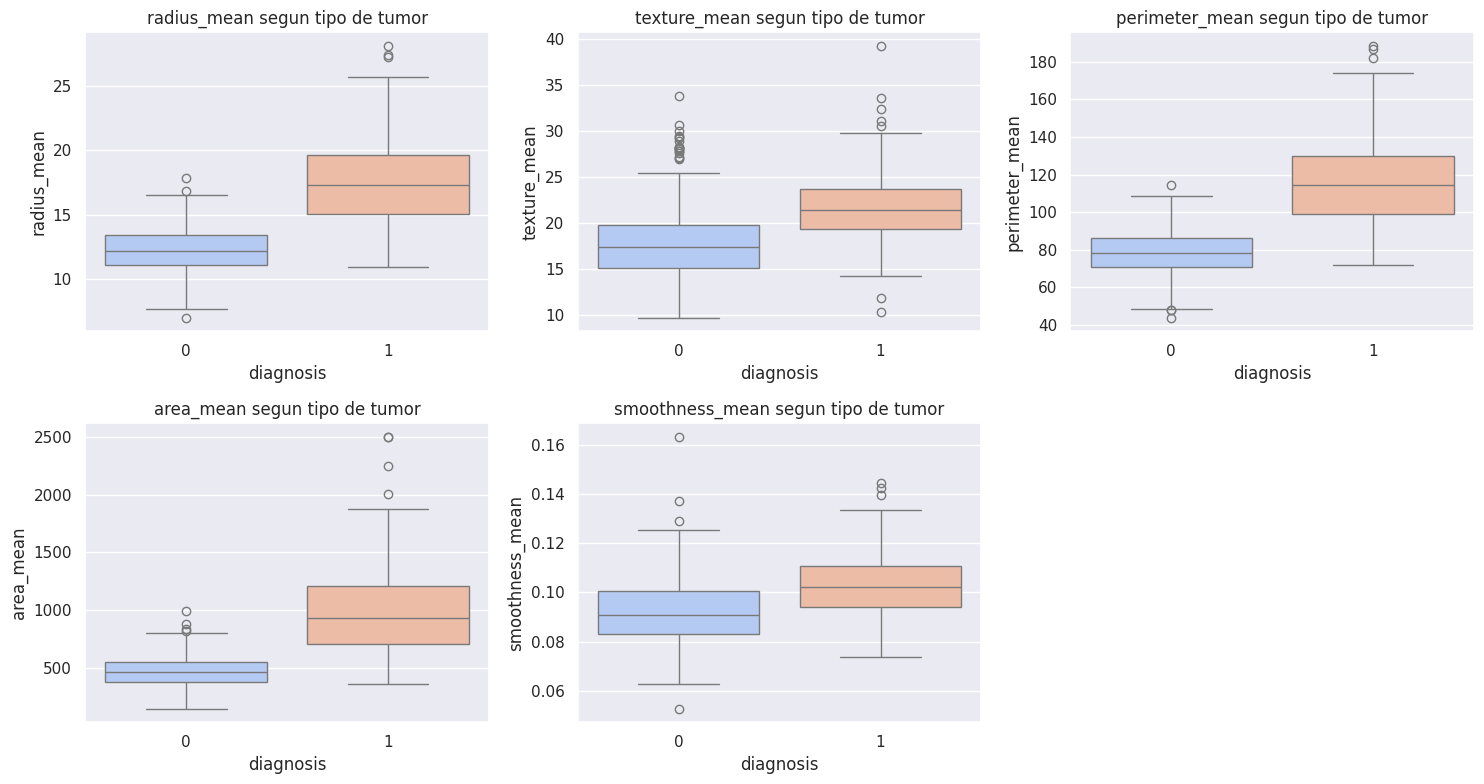

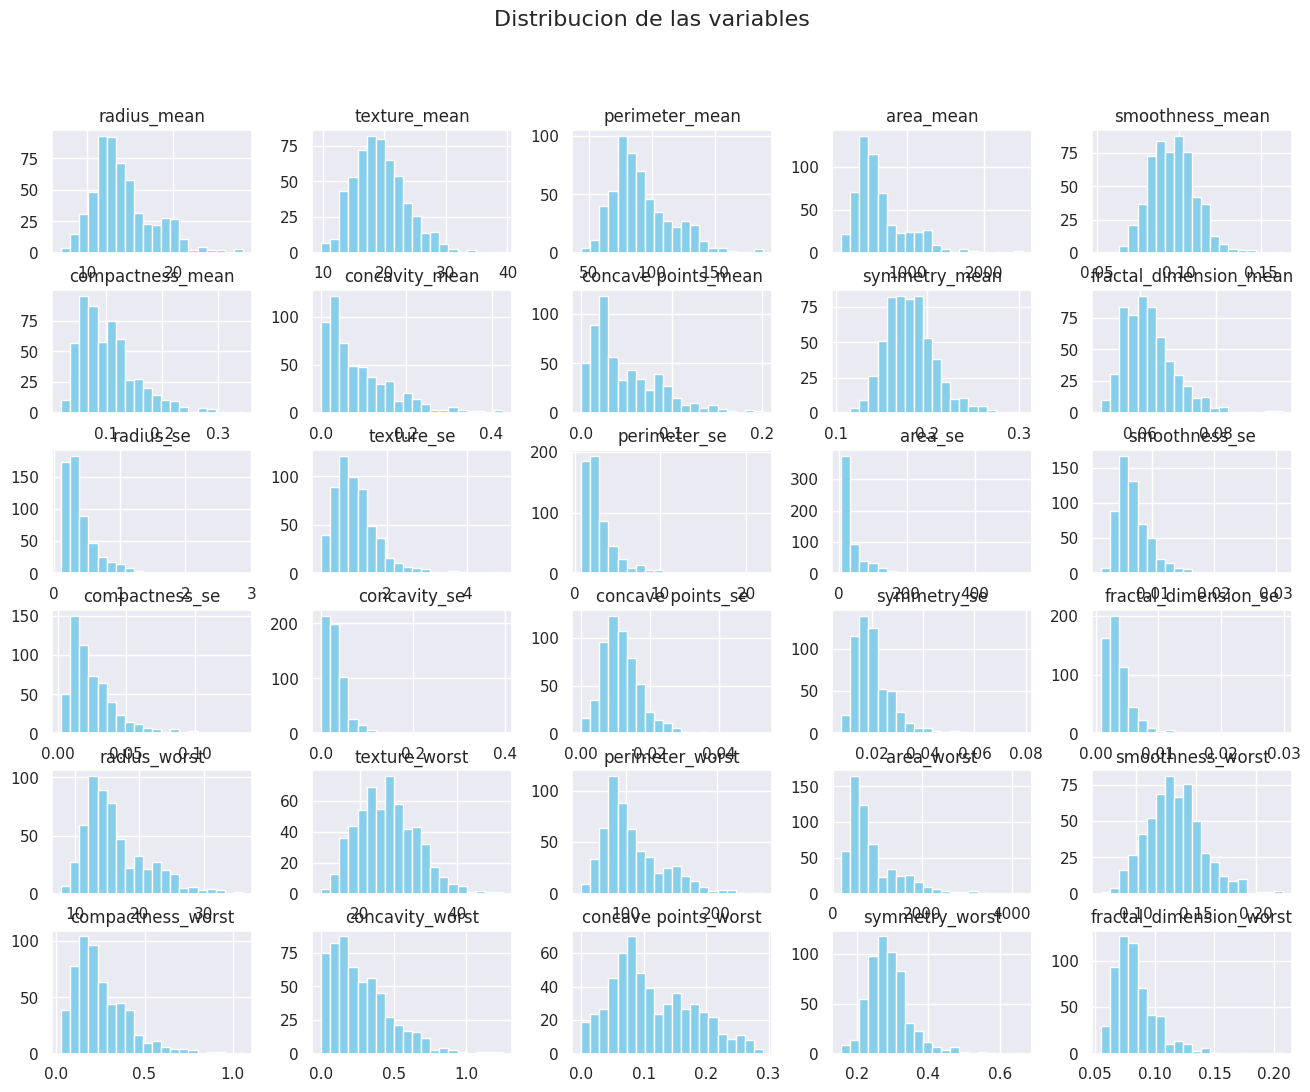


Correlaciones más fuertes con el diagnóstico:


,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


,diagnosis
smoothness_mean,0.358560
symmetry_mean,0.330499
fractal_dimension_worst,0.323872
compactness_se,0.292999
concavity_se,0.253730
fractal_dimension_se,0.077972
symmetry_se,-0.006522
texture_se,-0.008303
fractal_dimension_mean,-0.012838
smoothness_se,-0.067016


In [23]:
print("Descripcion de valores:")
display(df.describe())
print(df.isnull().sum())#cantidad de valores nulos

#vemos como se comporta a grandes rasgos la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',data=df,palette='Set2')
plt.title('Distribucion de tumores (0=Benigno, 1=Maligno)')
plt.show()

#armar boxplot para poder identificar valores fuera del rango
features=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(15,8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis',y=col,data=df, palette='coolwarm')
    plt.title(f'{col} segun tipo de tumor')
plt.tight_layout()
plt.show()

#histograma
df.drop('diagnosis', axis=1).hist(bins=20, figsize=(16,12), color='skyblue')
plt.suptitle('Distribucion de las variables', size=16)
plt.show()

#evaluamos las correlaciones mas fuertes
corr = df.corr()
corr_target = corr['diagnosis'].sort_values(ascending=False)
print("\nCorrelaciones más fuertes con el diagnóstico:")
display(corr_target.head(10))
display(corr_target.tail(10))


Las variables relacionadas con el tamaño y la forma del tumor (radius_mean, perimeter_mean y area_mean), muestran granndes dferencias entre tumores benignos y malignos, siendo mayores en los malignos.

Tambien las variables radius_worst, area_worst y perimeter_worst presentan alta correlacion con el diagnostico, indicando una fuerte capacidad discriminativa. En cambio, variables como smoothness_mean o fractal_dimension_mean no presentan diferencias marcadas entre clases, por lo que aportan menor informacion para distinguir los tipos de tumor.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [24]:
from scipy import stats

x=df.drop('diagnosis', axis=1)
y=df['diagnosis']

#normalizar variables
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
corr_matrix=x_scaled.corr().abs() #matriz de correlacion
sup=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) #correlaciones importantes
sup_corr=[column for column in sup.columns if any(sup[column] > 0.9)] #eliminar variables con correlaciones mayores a 0.9 (evitar redundancia)
print(f"\nVariables eliminadas por alta correlación (>0.9): {sup_corr}")
x_final=x_scaled.drop(columns=sup_corr)

#eliminamos outliers
z_scores = np.abs(stats.zscore(x_final))
mask_no_outliers=(z_scores<3).all(axis=1)
x_sin_outliers=x_final[mask_no_outliers]
y_sin_outliers=y[mask_no_outliers]



Variables eliminadas por alta correlación (>0.9): ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


Se utilizo StandardScaler para normalizar las variables numericas, ya que las tecnicas como PCA o SVM, reultan demasiado sensibles a las escalas de las variables.
Ademas, se aplico una eliminacion de multicolinealidad, descartando las variables con correlacion superior a 0.9 para reducir la redundancia de informacion.
Finalmente se eliminaron los valores atipicos detectados mediante Z-score, considerando como atipicos aquellos cuya magnitud supera 3 desviaciones estandar, de sta forma podemos reducir el efecto de puntos extremos que pueden distorsionar la interpretabilidad de los modelos, como PCA o SVM, mejorando la estabilidad y representatividad de los datos.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


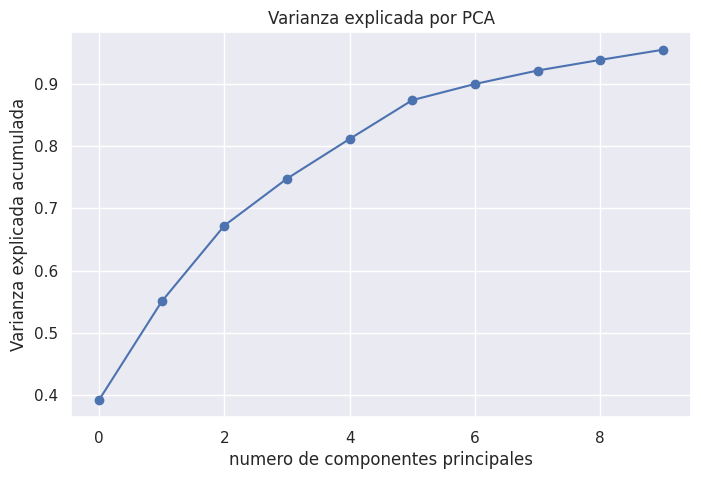

In [25]:
#aplicamos pca con 10 componentes
pca=PCA(n_components=10)  # mantenemos 10 componentes para analizar la varianza
pca.fit(x_sin_outliers)
explained_var=pca.explained_variance_ratio_


plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel('numero de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por PCA')
plt.grid(True)
plt.show()

con el grafico anterior podemos obtener la mejor forma de ver cuantas componentes son necesarias para mantener, en este caso desde la 5 a la 6ta son buenas opciones, pero para una mejor visualizacion solo usare 2

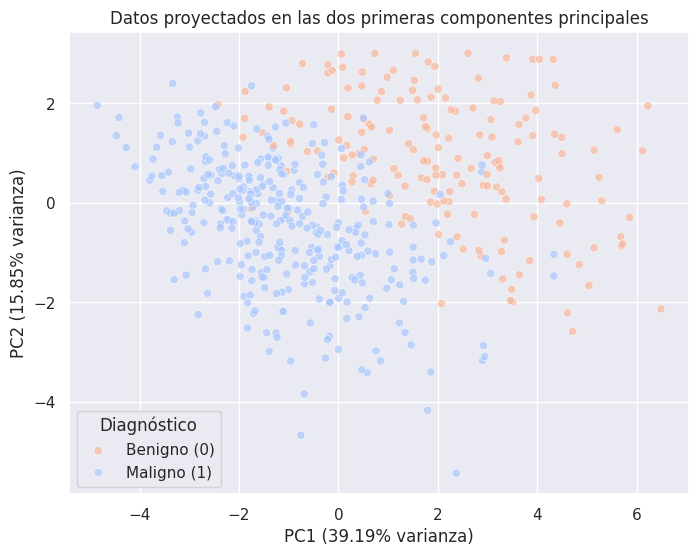

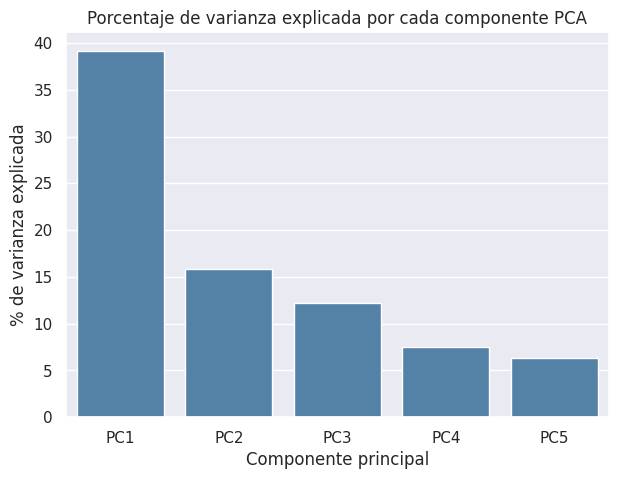

In [26]:
pca_d=PCA(n_components=5)
x_pca_d=pca_d.fit_transform(x_sin_outliers)
pca_df=pd.DataFrame({'PC1':x_pca_d[:,0],'PC2':x_pca_d[:,1],'diagnosis':y_sin_outliers.values
})
#graficamos los datos
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y='PC2', hue='diagnosis', palette='coolwarm', data=pca_df, alpha=0.7)
plt.title('Datos proyectados en las dos primeras componentes principales')
plt.xlabel(f'PC1 ({explained_var[0]*100:.2f}% varianza)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.2f}% varianza)')
plt.legend(title='Diagnóstico', labels=['Benigno (0)', 'Maligno (1)'])
plt.show()

#loadings
loadings = pd.DataFrame(
    pca_d.components_.T,
    columns=[f'PC{i+1}' for i in range(5)],
    index=x_sin_outliers.columns
)

plt.figure(figsize=(7,5))
sns.barplot(x=[f'PC{i+1}' for i in range(5)], y=pca_d.explained_variance_ratio_*100, color='steelblue')
plt.title('Porcentaje de varianza explicada por cada componente PCA')
plt.ylabel('% de varianza explicada')
plt.xlabel('Componente principal')
plt.show()

Las componentes principales (PC1 y PC2) explican aproximadamente cerca del 55% de la informacion total del conjunto de datos. Esto indica que una parte importante de la estructura de los datos puede representarse en un plano bidimensional, aunque aun existe informacion relevante en las demas componentes.

En la visualizacion se observa que las clases de tumores benignos y malignos presentan una separacion parcial y sugiere que las dos primeras componentes principales capturan patrones relevantes relacionados con el diagnostico, pero no son suficientes por si solas para lograr una separacion perfecta.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [27]:
from sklearn.metrics import (roc_auc_score, RocCurveDisplay)
#separar los datos
models={
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='rbf', probability=True),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}
x_train, x_test, y_train, y_test = train_test_split(x_pca_d, y_sin_outliers, test_size=0.2, random_state=42, stratify=y_sin_outliers)
results= []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    y_prob=model.predict_proba(x_test)[:,1]
    results.append({
        'Modelo': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
display(results_df)

,Modelo,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,LogisticRegression,0.950495,0.939394,0.911765,0.925373,0.977612
1,SVM,0.950495,0.967742,0.882353,0.923077,0.965320
2,RandomForest,0.920792,0.906250,0.852941,0.878788,0.957199


La Regresion Logistica y el SVM obtienen los mejores resultados generales, con una exactitud (accuracy) cercana al 95 %.
La Logistica muestra un mejor equilibrio entre precision (0.93) y recall (0.91), esto nos indica un buen compromiso entre identificar correctamente tumores malignos y evitar falsos positivos.
El SVM logra una precision ligeramente superior (0.97), pero con un recall algo menor (0.88), lo que sugiere que tiende a clasificar con mayor confianza pero omite algunos casos positivos. El Random Forest alcanza un rendimiento algo menor en todas las métricas, aunque sigue siendo competitivo y robusto frente al ruido.

En conjunto, el mejor compromiso entre precision y generalizacion lo presenta la Regresion Logistica, mientras que el SVM se destaca por su mayor precision en detrimento de un recall algo menor


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



# **Respuesta**

El modelo mas apropiado para este caso es la Regresion Logistica, ya que presenta el mejor equilibrio entre precision (0.93) y recall (0.91), además, mantiene una alta capacidad de generalizacion (AUC-ROC cercano a 0.98) y su interpretabilidad permite comprender cada variable en la decision del modelo.

Acerca del preprocesamiento, siempre se tiene un impacto clave en el rendimiento:
-la normalizacion de las variables aseguro que todos los datos tuvieran la misma escala, evitando que variables altas dominen el analisis

-La eliminacion de valores atipicos redujo el ruido permitiendo la estabilizacion en el entrenamiento

-Luego, la reduccion de dimensionalidad con PCA ayudo simplificando el conjunto de datos manteniendo cerca del 90% de la varianza (no se pierde demasiada informacion).

Estas medidas permitieron que la eficiencia mejorara y además evito problemas de sobreajuste.

Posibles mejoras: Dada la naturaleza del contexto, en un escenario real de diagnostico medico asistido por machine learning, se podrian aplicar muchas mejoras, como:
-Utilizar tecnicas de seleccion de caracteristicas explicables y asi poder identificar los marcadores mas importantes del cancer
-Tambien seria una buena opcion, probar enfoques mas avanzados como redes neuronales profundas.
Seria recomendable integrar tecnicas de interpretabilidad (Explainable AI) que permitirian a los medicos entender las razones de cada prediccion.

En resumen, el proceso de preprocesamiento y reduccion de dimensionalidad fue determinante para lograr modelos estables, precisos e interpretables, mostrando el potencial real de la inteligencia artificial como herramienta de apoyo en la deteccion temprana de enfermedades.